# **DIFFERENCE BETWEEN TWO IMAGES**



# Aim:
To find out differnce between two images using SSIM and fill the images with the part missing.

# Analysis Of The Code:

1. Importing all necessary libraries like numpy, matplotlib,sklearn etc.
2. Loading the images and converting them to grayscale
3. Compute SSIM (Structural Similairty Index) using the in-built functions.
4. The diff image contains the actual image differences between the two images and is represented as a floating point data type in the range [0,1] so we must convert the array to 8-bit unsigned integers in the range [0,255] before we can use them.
5. Threshold the difference image, followed by finding contours to obtain the regions of the two input images that differ.
6. Plot the images showing the difference.



# Code:

In [3]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

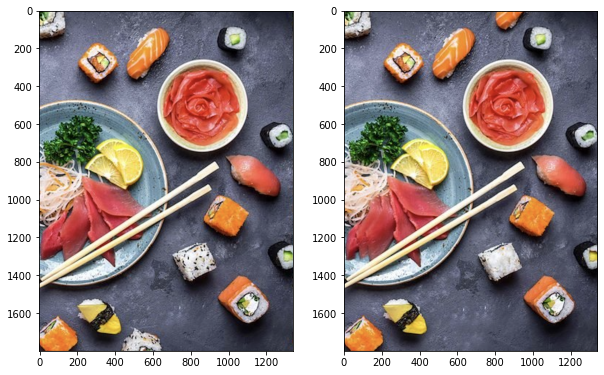

In [4]:
# Load images
before = io.imread('left.png')
after = io.imread('right.png')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(before)
plt.subplot(122)
plt.imshow(after)

In [5]:
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

Image Similarity: 71.0636%


Text(0.5, 1.0, 'All the missing parts highlighted in 2nd Image')

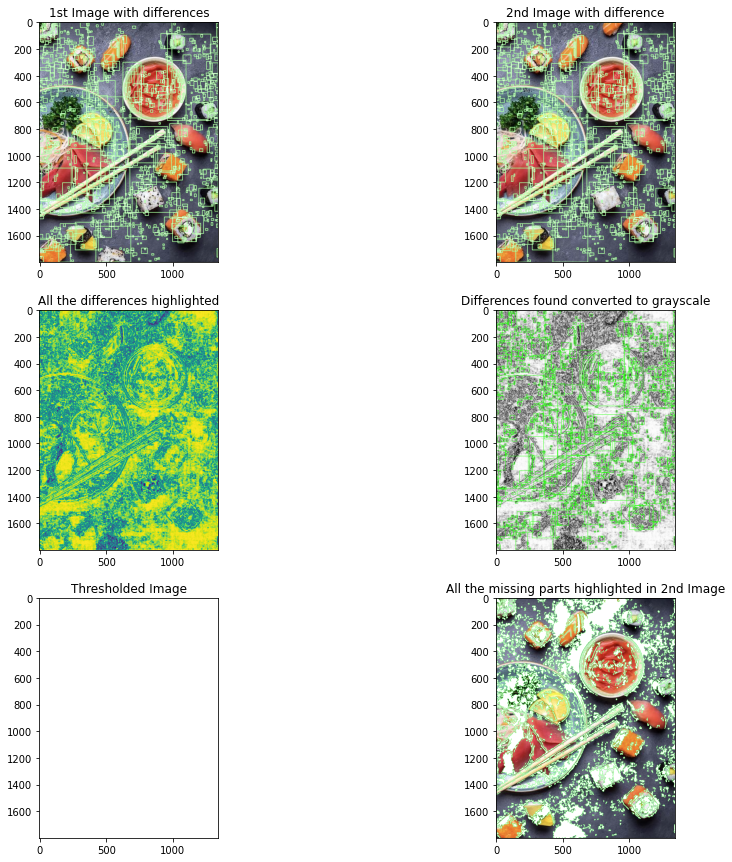

In [6]:
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(before)
plt.title('1st Image with differences')
plt.subplot(322)
plt.imshow(after)
plt.title('2nd Image with difference')
plt.subplot(323)
plt.imshow(diff)
plt.title('All the differences highlighted')
plt.subplot(324)
plt.imshow(diff_box)
plt.title('Differences found converted to grayscale')
plt.subplot(325)
plt.imshow(mask)
plt.title('Thresholded Image')
plt.subplot(326)
plt.imshow(filled_after)
plt.title('All the missing parts highlighted in 2nd Image')

# Conclusion:
I was able to complete the project by understanding about SSIM and was able to differ the two images and cover all the missing parts on the second image.